## Importing of Libraries

### Data Analysis Libraries

In [1]:
import pandas as pd
import numpy as np

### Libraries for Data Processing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

### Data Pre-Processing Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Classifiers Libraries

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Evaluation Metrics Libraries

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix

#### Importing of Warnings to avoid unneccesary warning signs

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Importing of Data

In [7]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\Project 2 - Diabetes Data-20240403T130023Z-001\\Project 2 - Diabetes Data\\Project 2 MeriSKILL\\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Making a Copy of the Data

In [8]:
c_data = data.copy()
c_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Cleaning

### Checking for Missing Data and Visualization

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: >

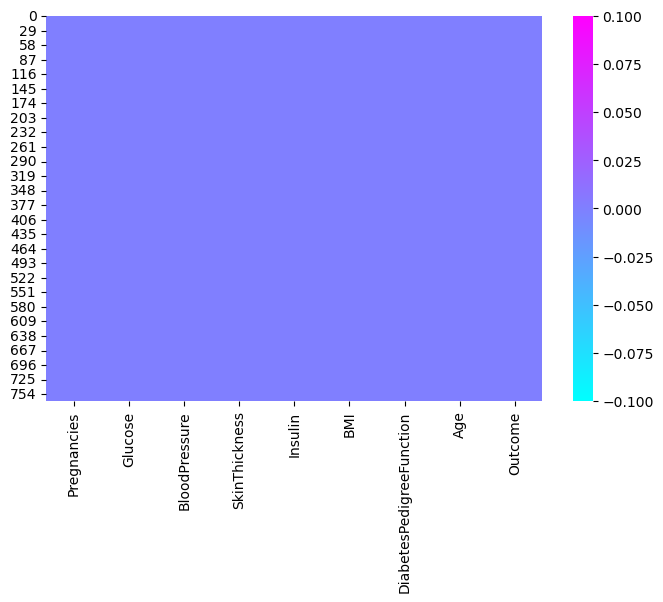

In [9]:
print(c_data.isnull().sum())

plt.figure(figsize = (8,5))
sns.heatmap(c_data.isnull(), cbar=True, cmap="cool")

In [10]:
c_data[c_data.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Understanding the Data

In [11]:
c_data.shape

(768, 9)

In [12]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
c_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

In [14]:
c_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Univariate

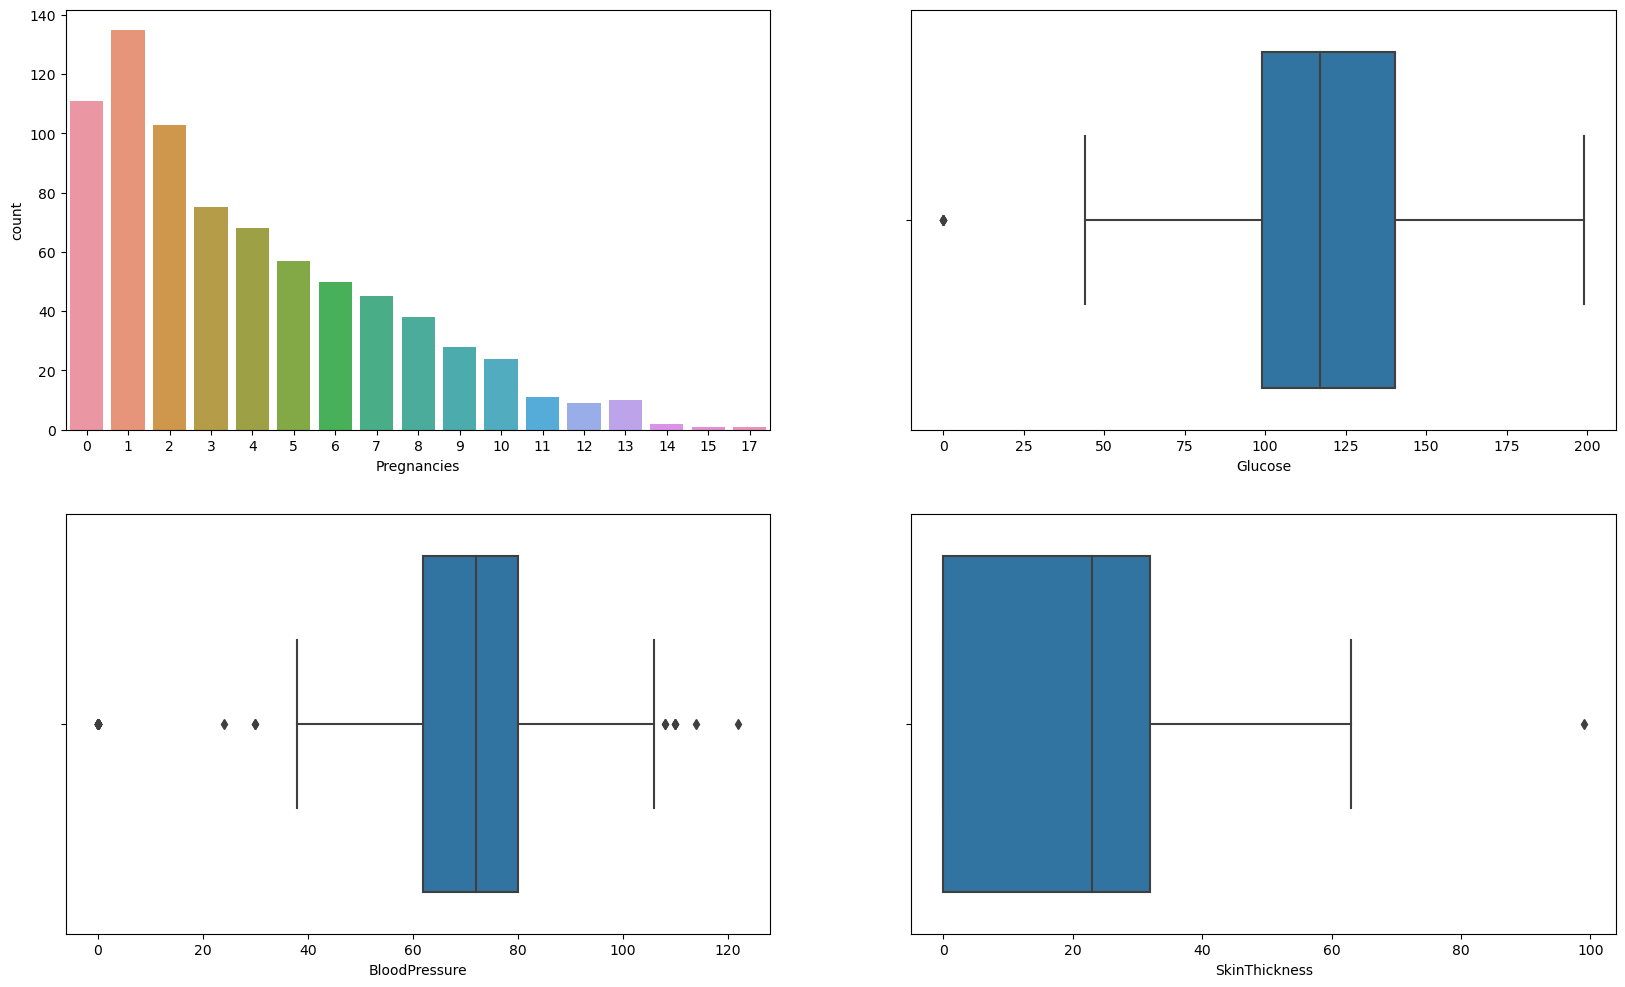

In [15]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x=c_data["Pregnancies"], ax = axs[0,0])
plt2 = sns.boxplot(x=c_data["Glucose"], ax = axs[0,1])
plt3 = sns.boxplot(x=c_data["BloodPressure"], ax = axs[1,0])
plt4 = sns.boxplot(x=c_data["SkinThickness"], ax = axs[1,1])

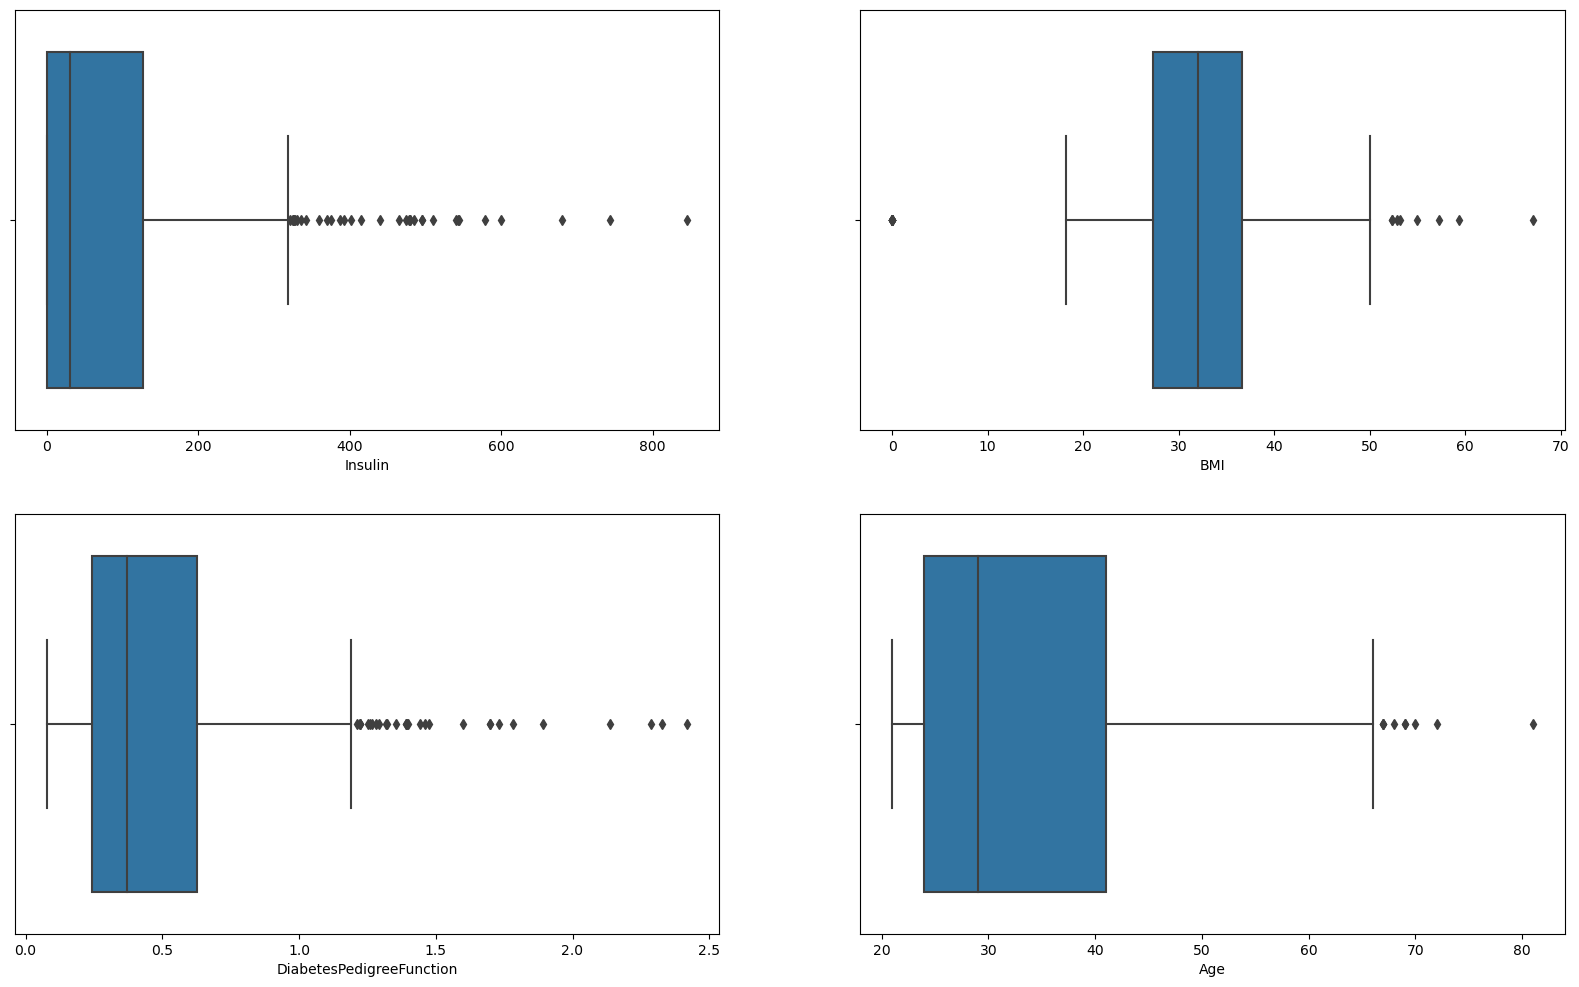

In [16]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.boxplot(x=c_data["Insulin"], ax = axs[0,0])
plt2 = sns.boxplot(x=c_data["BMI"], ax = axs[0,1])
plt3 = sns.boxplot(x=c_data["DiabetesPedigreeFunction"], ax = axs[1,0])
plt4 = sns.boxplot(x=c_data["Age"], ax = axs[1,1])

Outcome
0    500
1    268
Name: count, dtype: int64


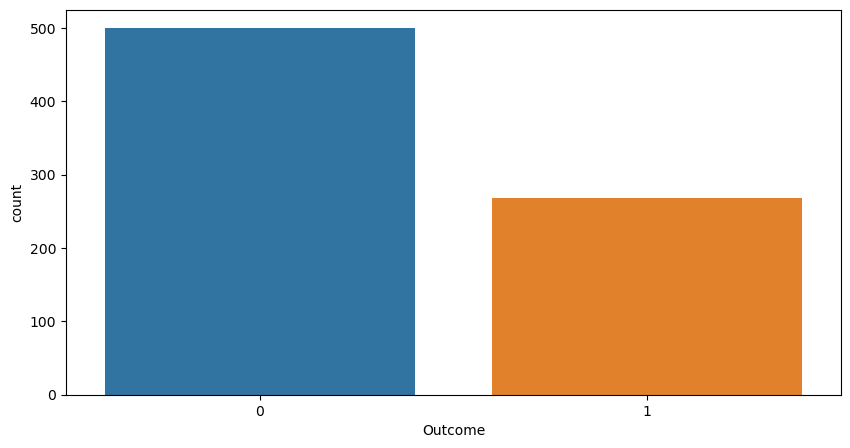

In [17]:
fig, axs = plt.subplots(figsize=(10,5))
sns.countplot(x="Outcome", data= c_data);

print(c_data["Outcome"].value_counts())

## Bivariate

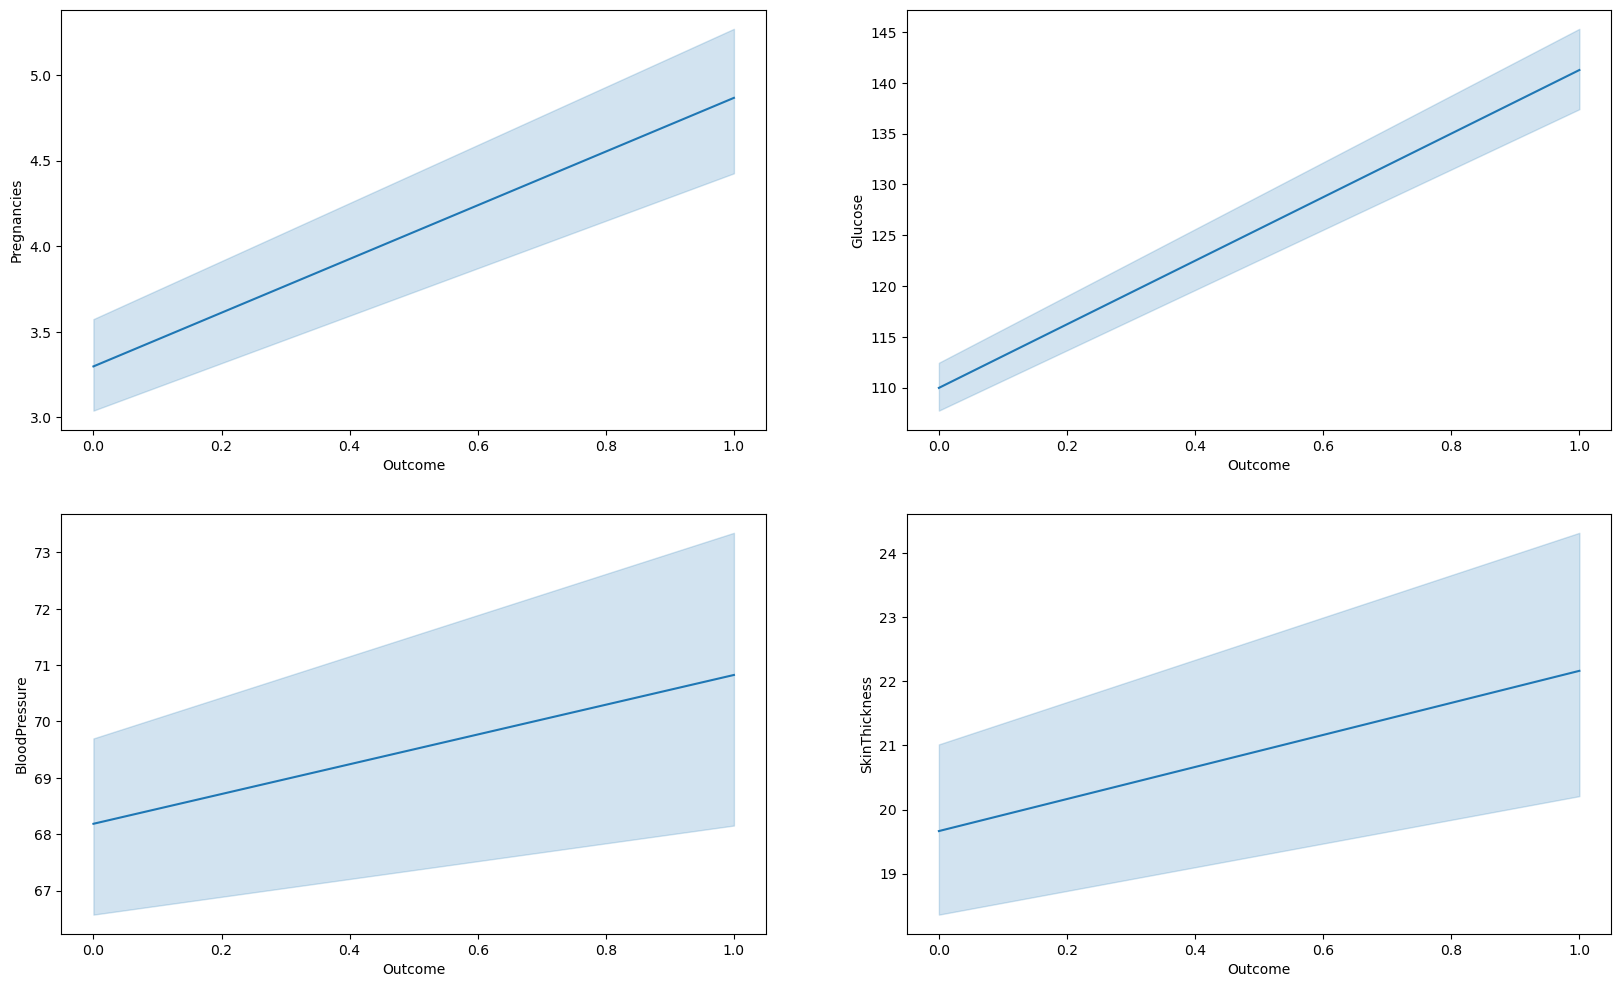

In [18]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.lineplot(y="Pregnancies", x="Outcome", data= c_data, ax = axs[0,0])
plt2 = sns.lineplot(y="Glucose", x="Outcome", data= c_data, ax = axs[0,1])
plt3 = sns.lineplot(y="BloodPressure", x="Outcome", data= c_data, ax = axs[1,0])
plt4 = sns.lineplot(y="SkinThickness", x="Outcome", data= c_data, ax = axs[1,1])

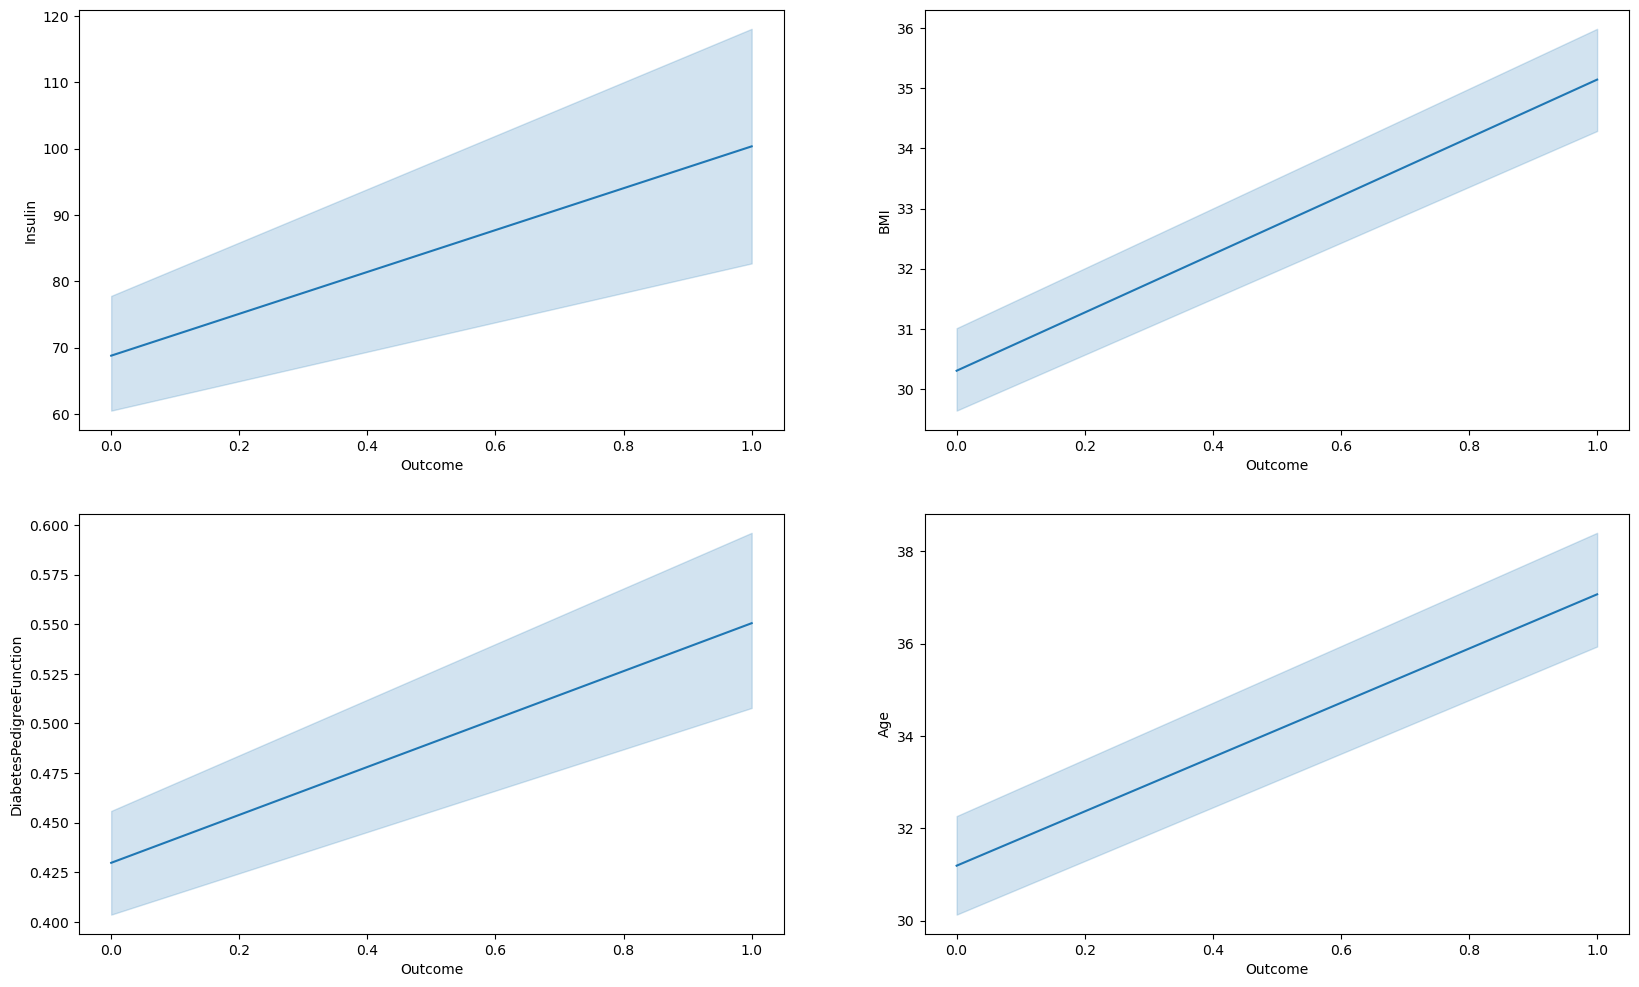

In [19]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.lineplot(y="Insulin", x="Outcome", data= c_data, ax = axs[0,0])
plt2 = sns.lineplot(y="BMI", x="Outcome", data= c_data, ax = axs[0,1])
plt3 = sns.lineplot(y="DiabetesPedigreeFunction", x="Outcome", data= c_data, ax = axs[1,0])
plt4 = sns.lineplot(y="Age", x="Outcome", data= c_data, ax = axs[1,1])

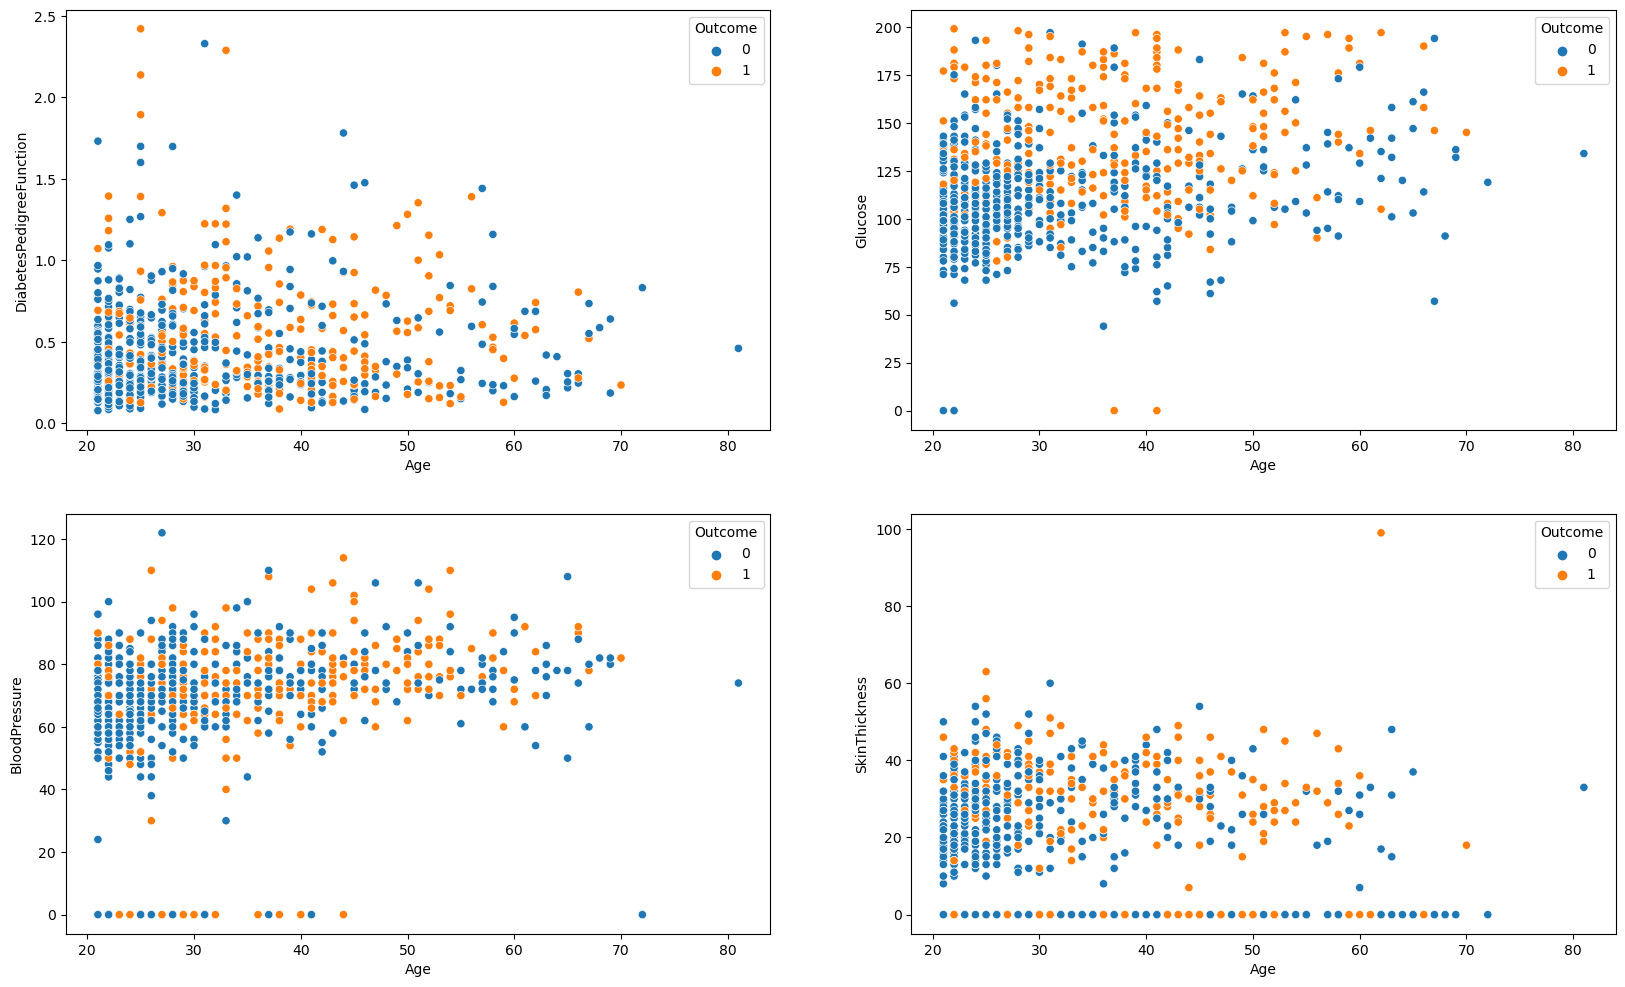

In [20]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.scatterplot(y="DiabetesPedigreeFunction", x="Age", data= c_data, hue="Outcome", ax = axs[0,0])
plt2 = sns.scatterplot(y="Glucose", x="Age", data= c_data, hue="Outcome", ax = axs[0,1])
plt3 = sns.scatterplot(y="BloodPressure", x="Age", data= c_data, hue="Outcome", ax = axs[1,0])
plt4 = sns.scatterplot(y="SkinThickness", x="Age", data= c_data, hue="Outcome", ax = axs[1,1])

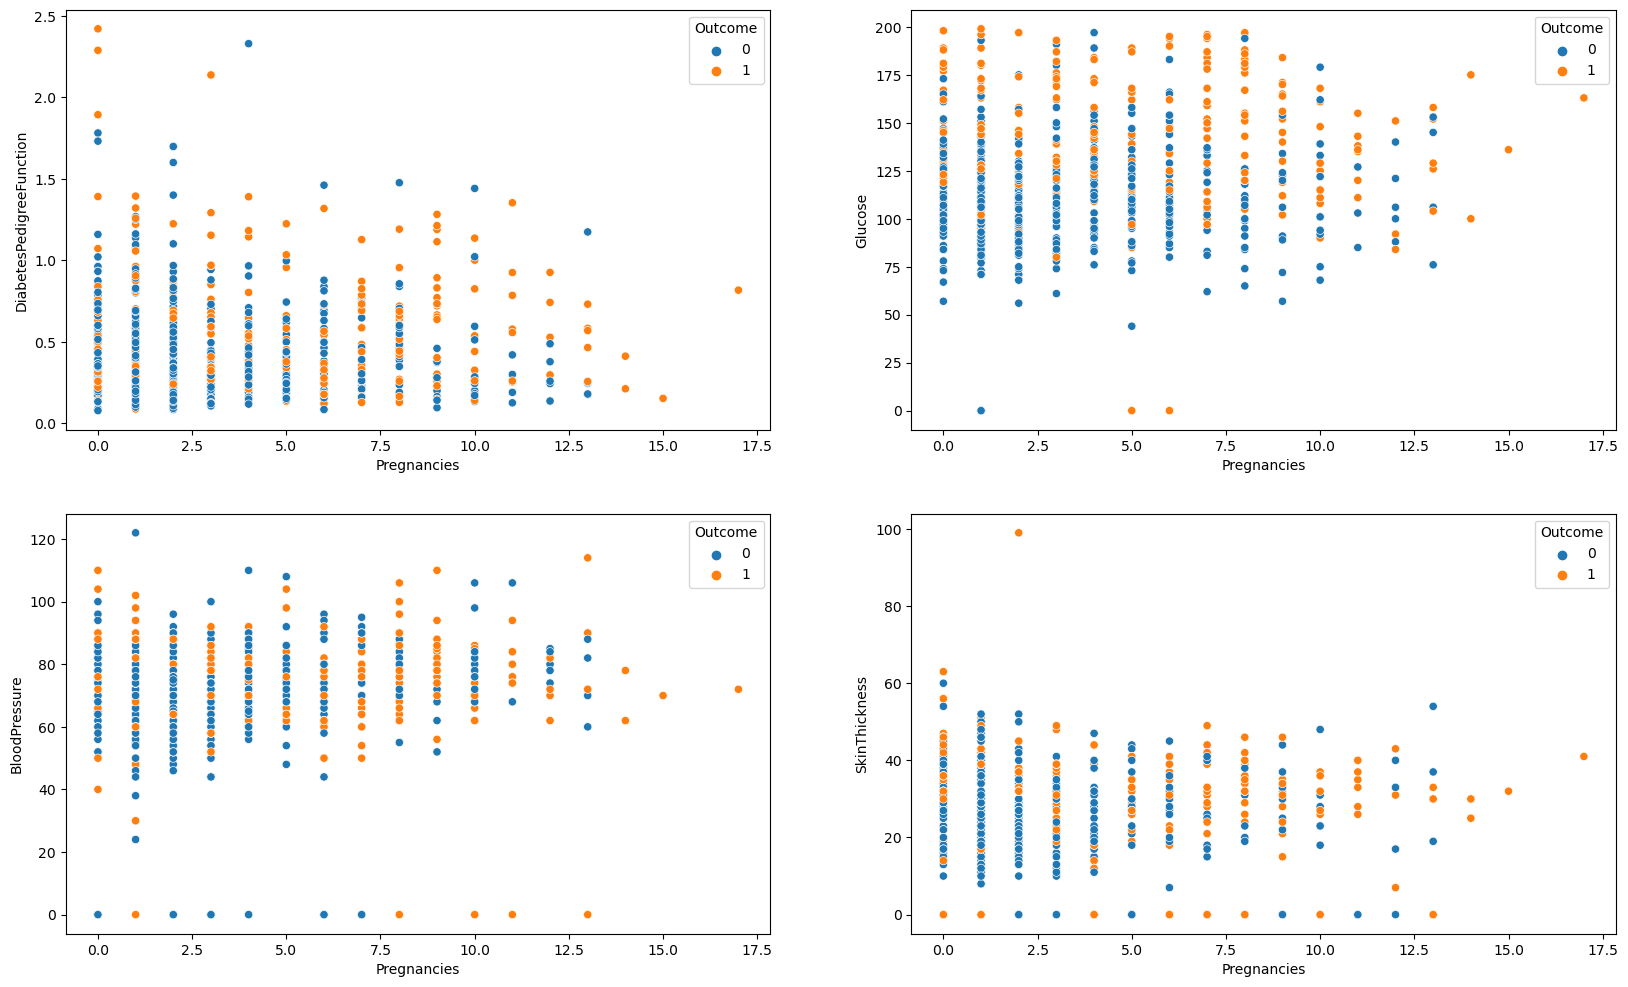

In [21]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.scatterplot(y="DiabetesPedigreeFunction", x="Pregnancies", data= c_data, hue="Outcome", ax = axs[0,0])
plt2 = sns.scatterplot(y="Glucose", x="Pregnancies", data= c_data, hue="Outcome", ax = axs[0,1])
plt3 = sns.scatterplot(y="BloodPressure", x="Pregnancies", data= c_data, hue="Outcome", ax = axs[1,0])
plt4 = sns.scatterplot(y="SkinThickness", x="Pregnancies", data= c_data, hue="Outcome", ax = axs[1,1])

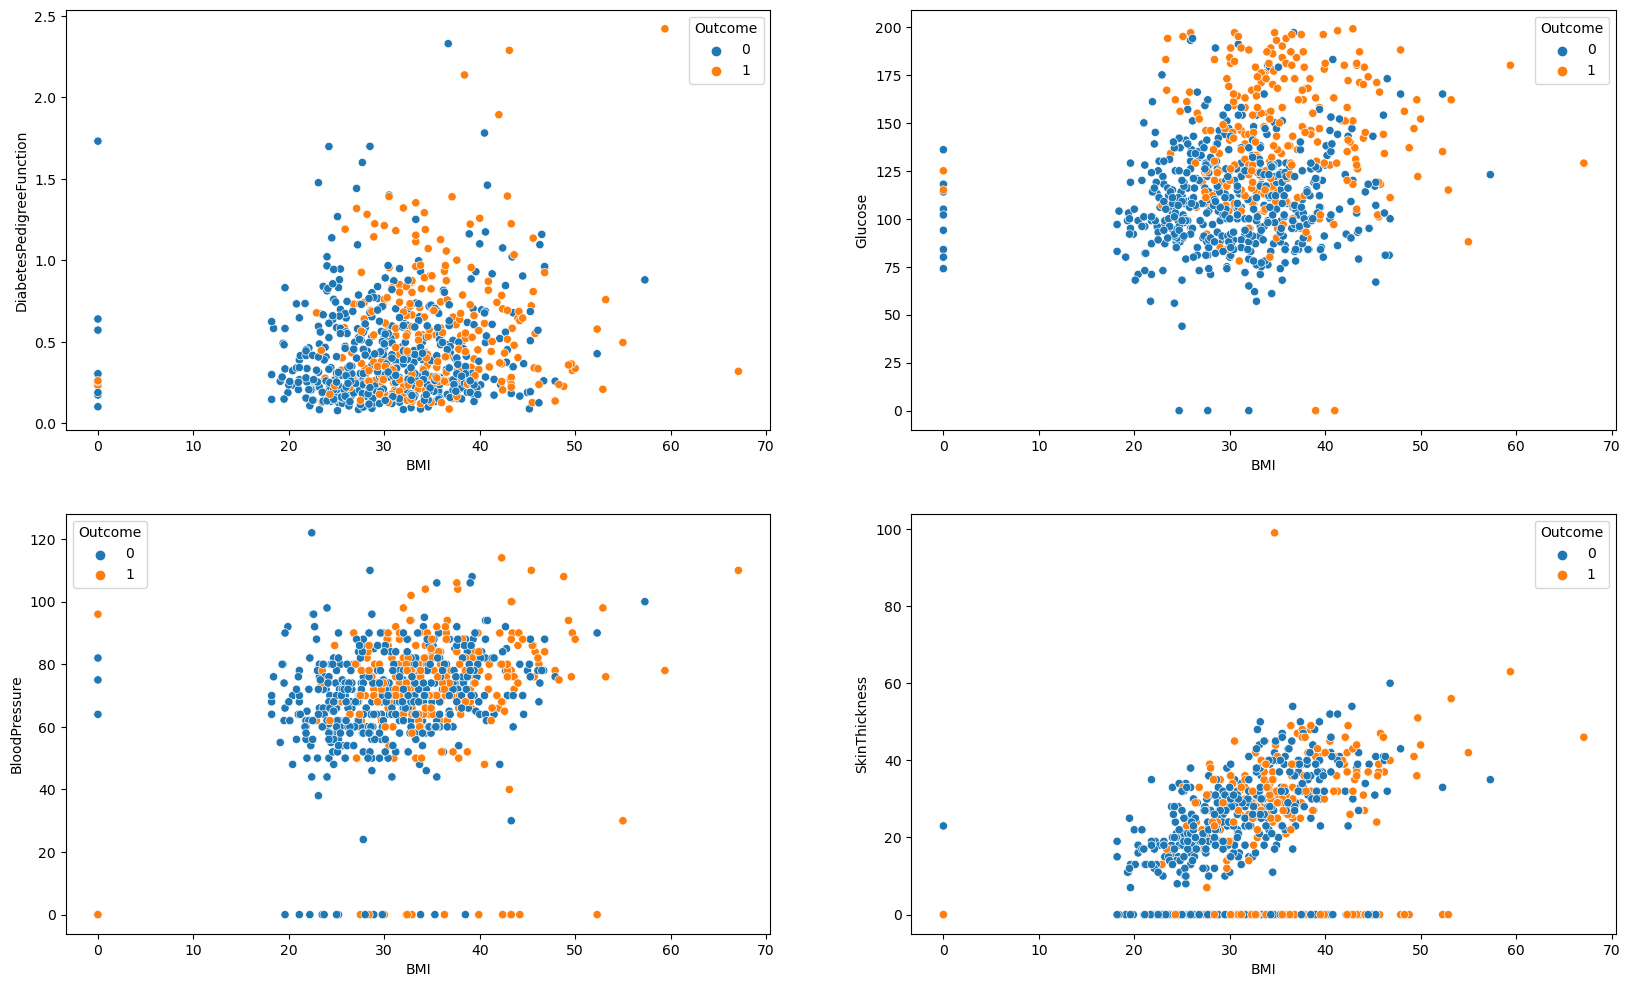

In [22]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.scatterplot(y="DiabetesPedigreeFunction", x="BMI", data= c_data, hue="Outcome", ax = axs[0,0])
plt2 = sns.scatterplot(y="Glucose", x="BMI", data= c_data, hue="Outcome", ax = axs[0,1])
plt3 = sns.scatterplot(y="BloodPressure", x="BMI", data= c_data, hue="Outcome", ax = axs[1,0])
plt4 = sns.scatterplot(y="SkinThickness", x="BMI", data= c_data, hue="Outcome", ax = axs[1,1])

## Multivariate

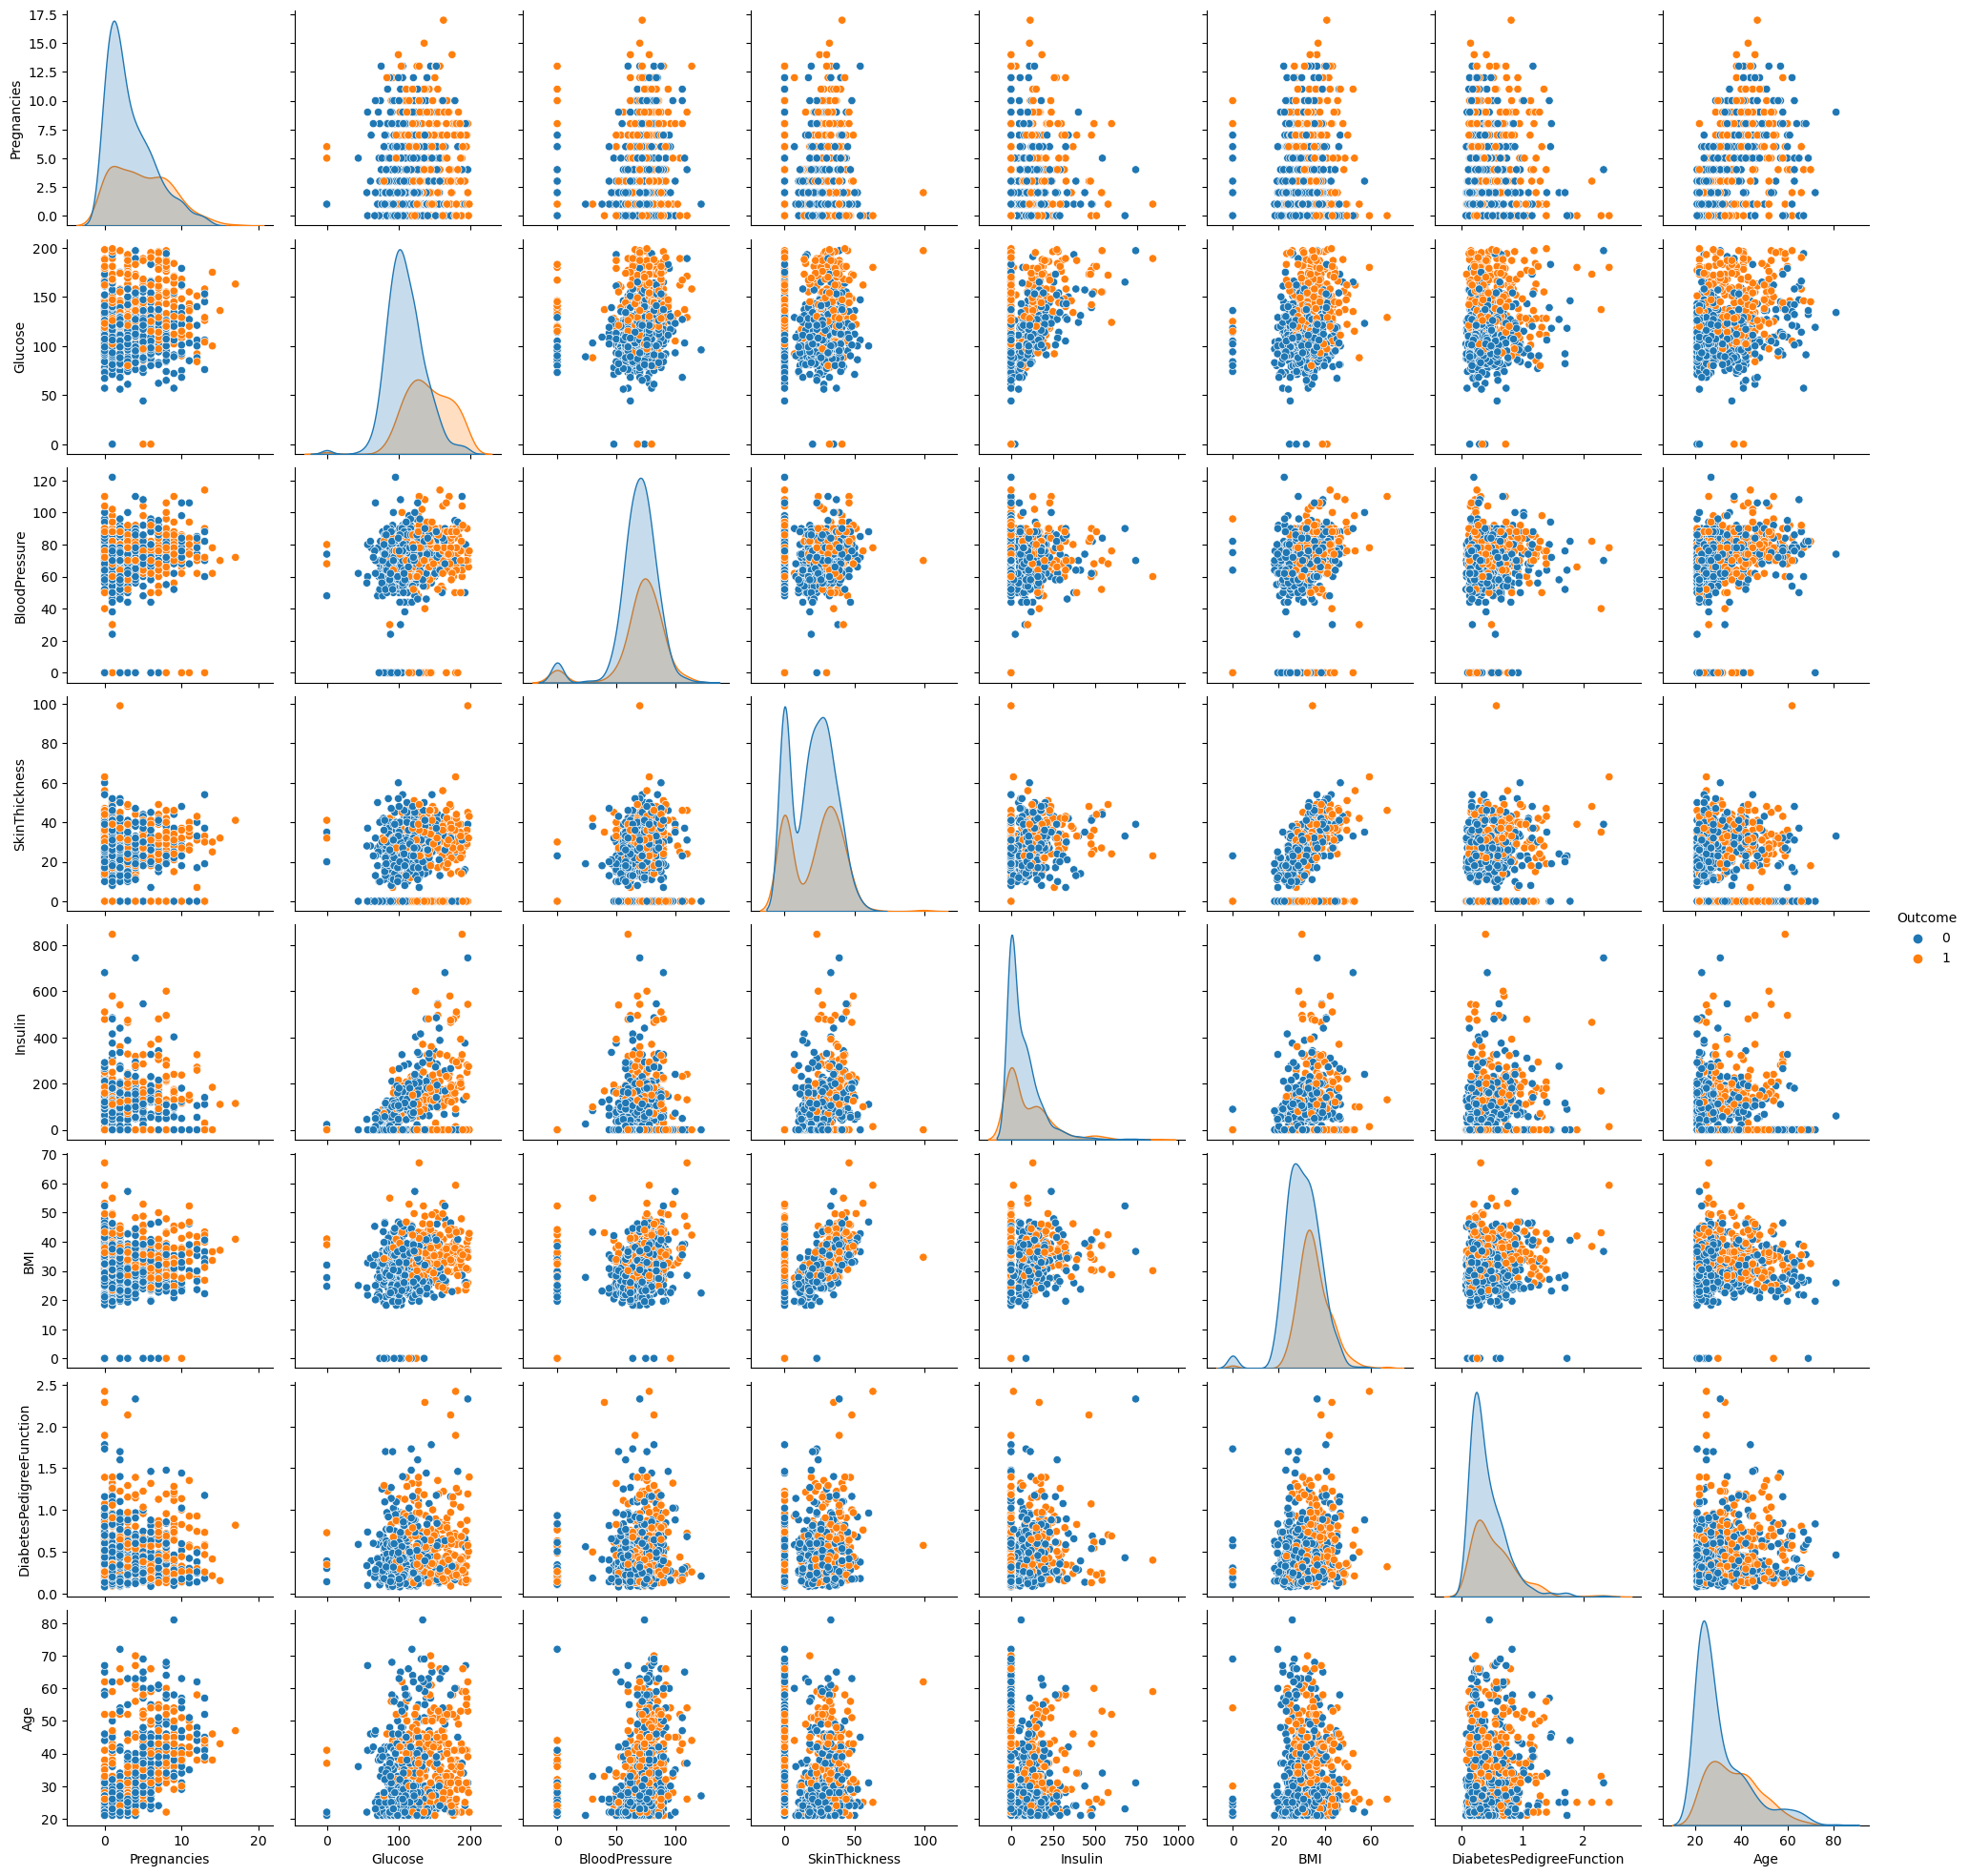

In [23]:
#To plot some selected features

cat_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.pairplot(c_data[cat_var], hue= "Outcome")

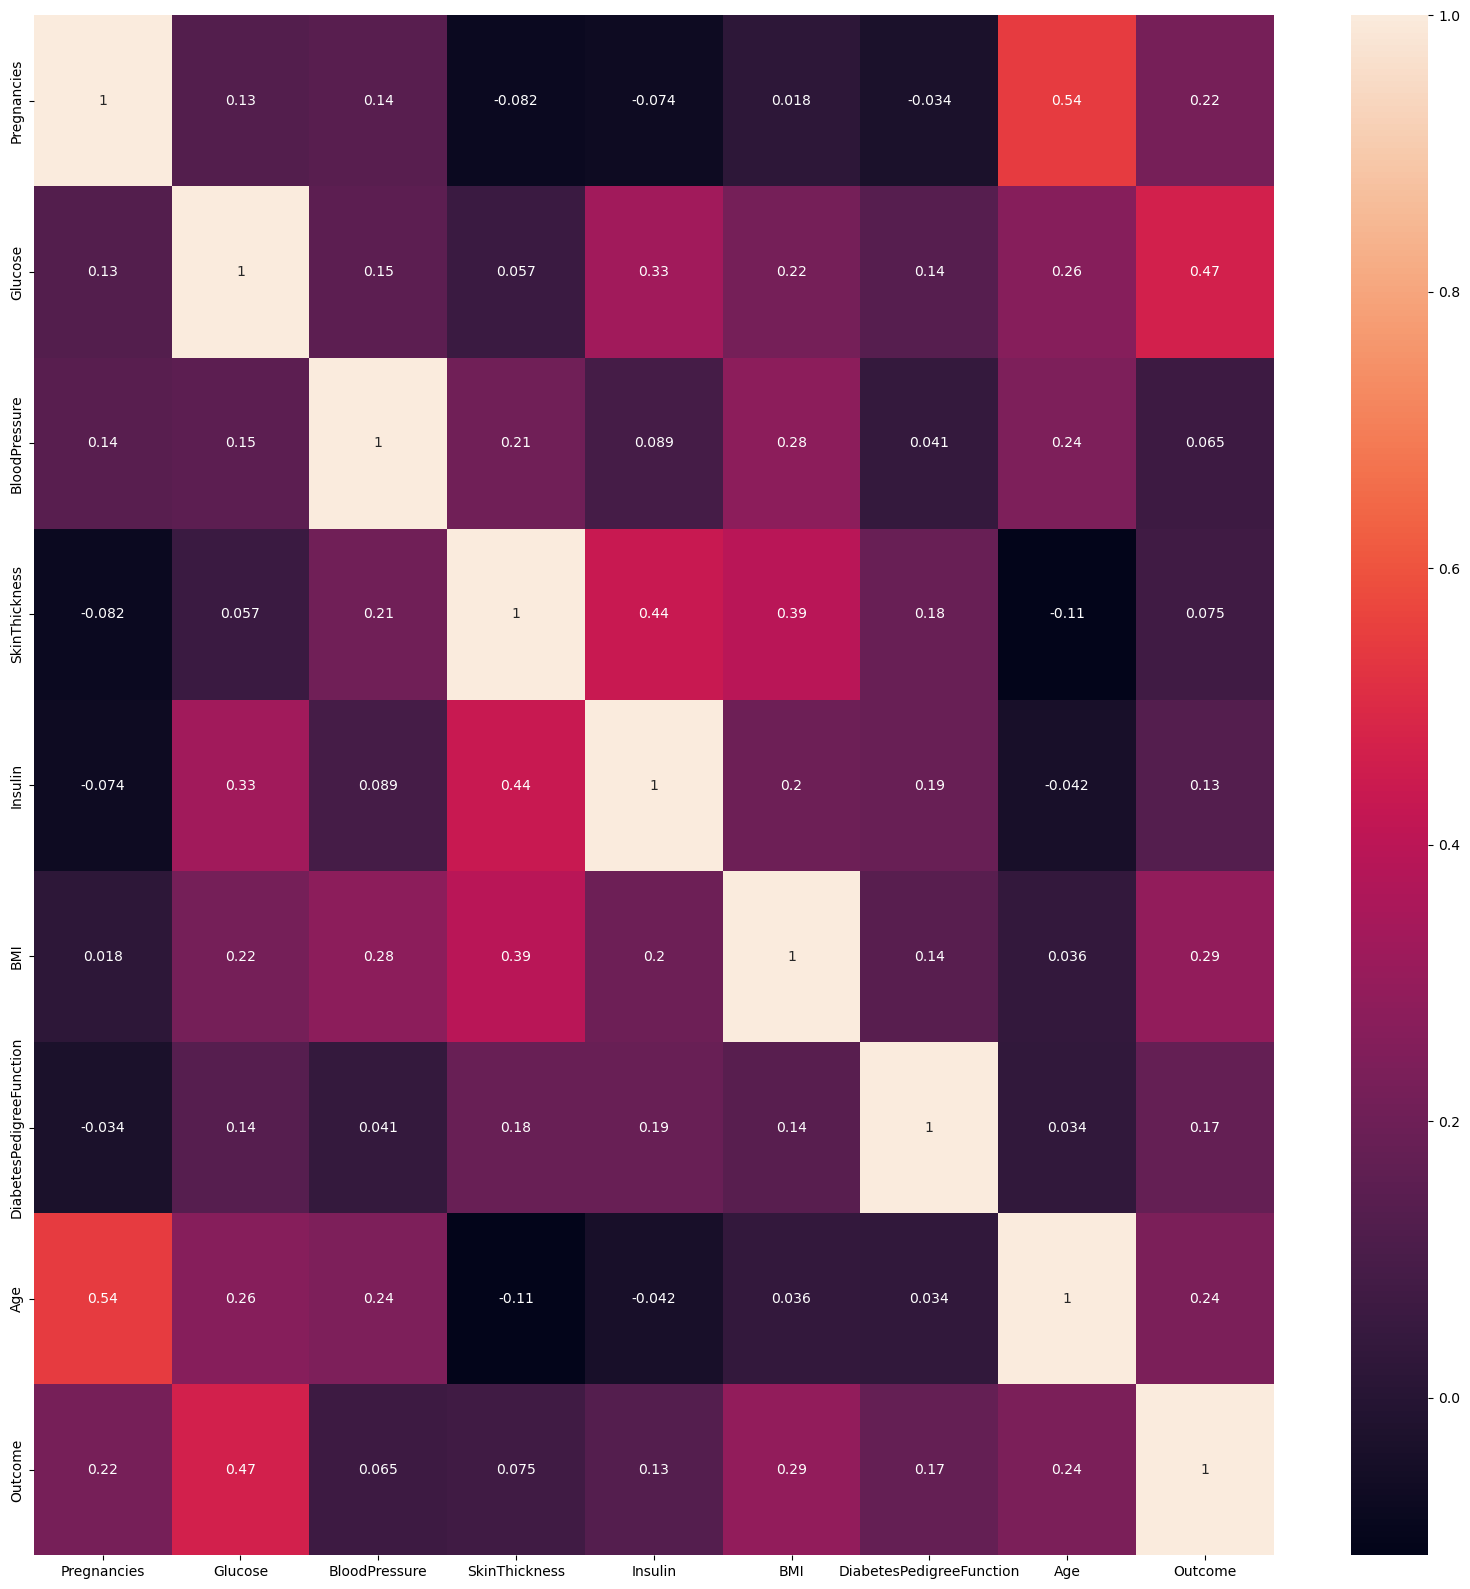

In [24]:
#correlation matrix

plt.figure(figsize=(20,20))
sns.heatmap(c_data.corr(),annot=True);

# Data Pre-Processing

In [25]:
d_data = c_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
label = c_data[["Outcome"]]

In [26]:
d_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
label.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


## Scaling

In [28]:
#scaler = StandardScaler()

scaler = MinMaxScaler()
s_data = pd.DataFrame(scaler.fit_transform(d_data),columns=d_data.columns)

In [29]:
s_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


[0.06480598 0.07240822 0.08518155 0.08914245 0.13164329 0.13706739
 0.16954462 0.25020649]


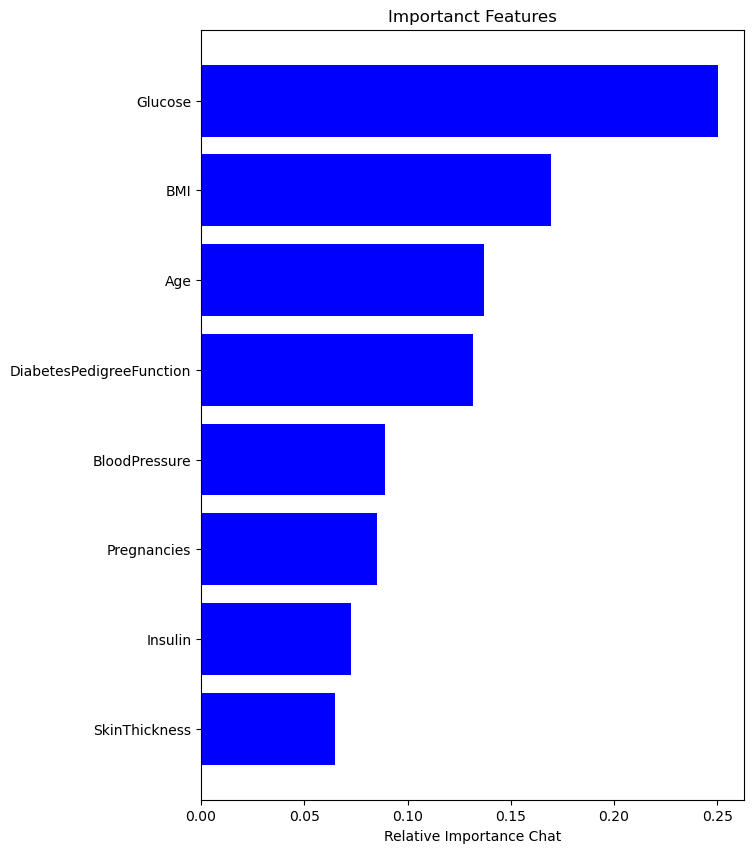

In [30]:
rfc = RandomForestClassifier()
rfc.fit(s_data, label)
name_f = list(s_data.columns)
importances = rfc.feature_importances_
indices = np.argsort(importances)

print(importances[indices])
plt.figure(figsize=(7, 10))
plt.barh(range(len(indices)), importances[indices], color="Blue")
plt.yticks(range(len(indices)), [name_f[i] for i in indices])
plt.xlabel("Relative Importance Chat")
plt.title("Importanct Features")
plt.show()


# Machine Learning

In [31]:
X_train, X_test, y_train, y_test =train_test_split(s_data, label, test_size=0.2, random_state=42)

In [32]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
618,0.529412,0.562814,0.672131,0.242424,0.000000,0.420268,0.514091,0.483333
346,0.058824,0.698492,0.377049,0.191919,0.098109,0.427720,0.245944,0.016667
294,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
231,0.352941,0.673367,0.655738,0.373737,0.437352,0.688525,0.068318,0.416667


In [33]:
y_train.head()

,Outcome
60,0
618,1
346,0
294,0
231,1


## Model building

In [34]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

Prediction = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, Prediction))
print("Precision:", precision_score(y_test, Prediction))
print("Recall:", recall_score(y_test, Prediction))
print("F1-score:", f1_score(y_test, Prediction))
print("AUC-ROC:", roc_auc_score(y_test, Prediction))

Logistic Regression
Accuracy: 0.7662337662337663
Precision: 0.7111111111111111
Recall: 0.5818181818181818
F1-score: 0.64
AUC-ROC: 0.7252525252525253


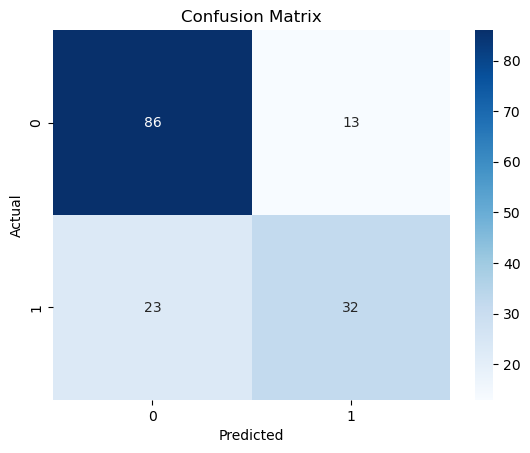

In [35]:
cm = confusion_matrix(y_test, Prediction)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap = "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.7337662337662337
Precision: 0.6296296296296297
Recall: 0.6181818181818182
F1-score: 0.6238532110091743
AUC-ROC: 0.7080808080808081


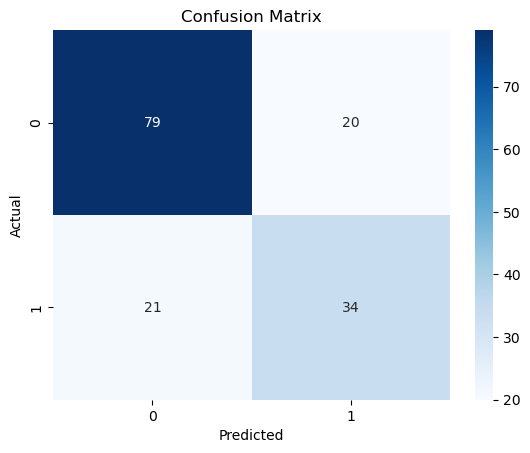

In [37]:
cm = confusion_matrix(y_test, rfy_pred)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap = "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
#Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# Save the model as a pickle file
filename = "sales.pkl"
joblib.dump(logreg, filename)

['sales.pkl']